In [1]:
%%capture
%run 5.2_Causal_Attention_Class.ipynb

In [4]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        
        self.heads = nn.ModuleList(
            [CausalAttention(
                d_in, d_out, context_length, dropout, qkv_bias
            )
            for _ in range(num_heads)]
        )

    def forward(self, x):
        for head in self.heads:
            print(head(x), end="\n\n")
        return torch.cat([head(x) for head in self.heads], dim=-1)

In [11]:
torch.manual_seed(666)

mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)

tensor([[[0.1888, 0.2392],
         [0.2342, 0.3205],
         [0.2489, 0.3449],
         [0.2147, 0.3002],
         [0.2409, 0.3300],
         [0.2113, 0.2948]],

        [[0.1888, 0.2392],
         [0.2342, 0.3205],
         [0.2489, 0.3449],
         [0.2147, 0.3002],
         [0.2409, 0.3300],
         [0.2113, 0.2948]]], grad_fn=<UnsafeViewBackward0>)

tensor([[[-0.3895,  0.0777],
         [-0.5530,  0.2033],
         [-0.6090,  0.2434],
         [-0.5671,  0.2480],
         [-0.5255,  0.1851],
         [-0.5274,  0.2267]],

        [[-0.3895,  0.0777],
         [-0.5530,  0.2033],
         [-0.6090,  0.2434],
         [-0.5671,  0.2480],
         [-0.5255,  0.1851],
         [-0.5274,  0.2267]]], grad_fn=<UnsafeViewBackward0>)



In [13]:
print(context_vecs, end="\n\n")
print("MHA-Context Vectors Shape =>", context_vecs.shape)

tensor([[[ 0.1888,  0.2392, -0.3895,  0.0777],
         [ 0.2342,  0.3205, -0.5530,  0.2033],
         [ 0.2489,  0.3449, -0.6090,  0.2434],
         [ 0.2147,  0.3002, -0.5671,  0.2480],
         [ 0.2409,  0.3300, -0.5255,  0.1851],
         [ 0.2113,  0.2948, -0.5274,  0.2267]],

        [[ 0.1888,  0.2392, -0.3895,  0.0777],
         [ 0.2342,  0.3205, -0.5530,  0.2033],
         [ 0.2489,  0.3449, -0.6090,  0.2434],
         [ 0.2147,  0.3002, -0.5671,  0.2480],
         [ 0.2409,  0.3300, -0.5255,  0.1851],
         [ 0.2113,  0.2948, -0.5274,  0.2267]]], grad_fn=<CatBackward0>)

MHA-Context Vectors Shape => torch.Size([2, 6, 4])


<div align="center">
  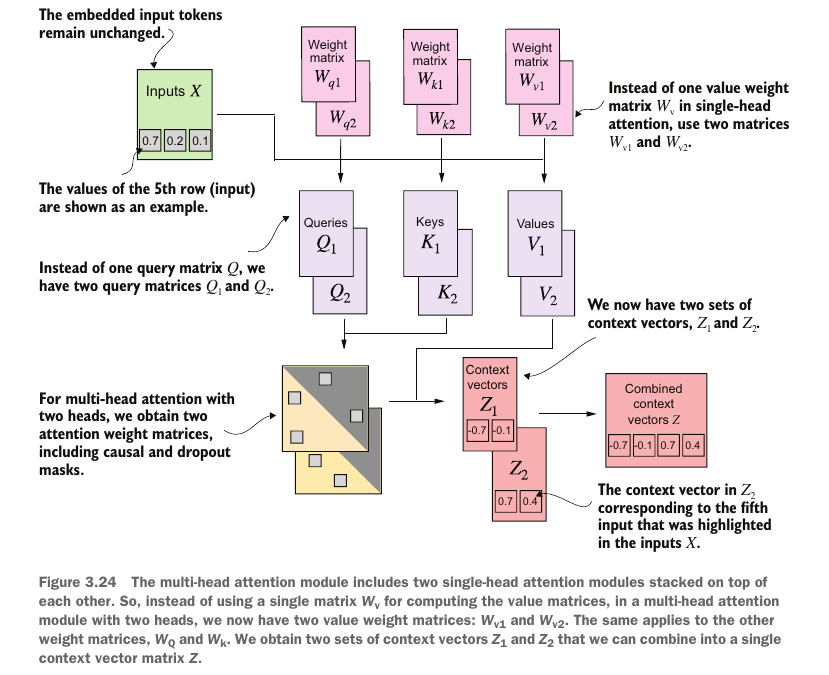
</div>

<div align="center">
  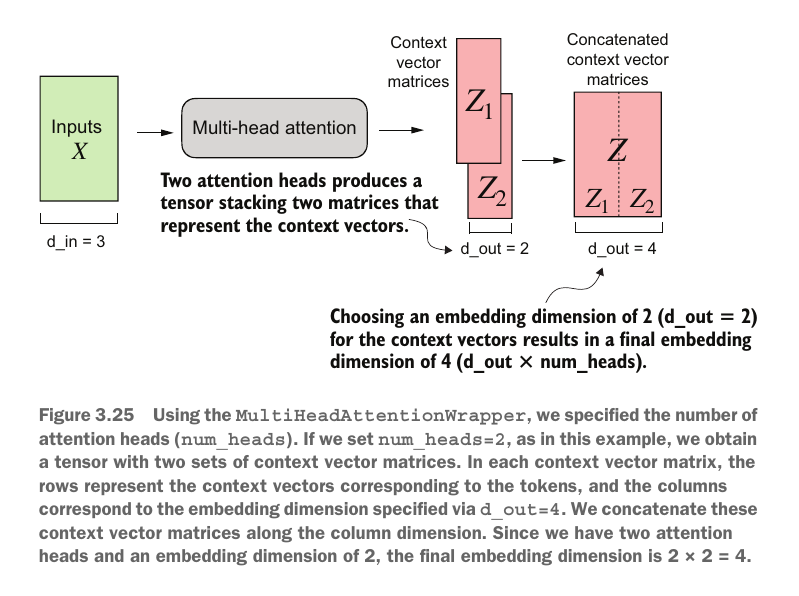
</div>

In [14]:
# Exercise 3.2 Returning 2-Dim Context Vectors With 2 Heads:

d_out = 1
mha_two_dim = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs_two_dim = mha_two_dim(batch)

tensor([[[-0.6964],
         [-0.8479],
         [-0.8957],
         [-0.8147],
         [-0.7412],
         [-0.7405]],

        [[-0.6964],
         [-0.8479],
         [-0.8957],
         [-0.8147],
         [-0.7412],
         [-0.7405]]], grad_fn=<UnsafeViewBackward0>)

tensor([[[-0.3620],
         [-0.3947],
         [-0.4052],
         [-0.3576],
         [-0.3427],
         [-0.3263]],

        [[-0.3620],
         [-0.3947],
         [-0.4052],
         [-0.3576],
         [-0.3427],
         [-0.3263]]], grad_fn=<UnsafeViewBackward0>)



In [15]:
print(context_vecs_two_dim, end="\n\n")
print("MHA-Context Vectors Shape =>", context_vecs_two_dim.shape)

tensor([[[-0.6964, -0.3620],
         [-0.8479, -0.3947],
         [-0.8957, -0.4052],
         [-0.8147, -0.3576],
         [-0.7412, -0.3427],
         [-0.7405, -0.3263]],

        [[-0.6964, -0.3620],
         [-0.8479, -0.3947],
         [-0.8957, -0.4052],
         [-0.8147, -0.3576],
         [-0.7412, -0.3427],
         [-0.7405, -0.3263]]], grad_fn=<CatBackward0>)

MHA-Context Vectors Shape => torch.Size([2, 6, 2])
